In [61]:
import mediapy as media
import os
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
import numpy as np
from PIL import Image

In [62]:
#constants 
assets_path = "./assets"

def get_path_to_video(video_file_name):
    return os.path.join(assets_path, video_file_name)

video1_file_path = get_path_to_video('video1_category1.mp4')
video2_file_path = get_path_to_video('video2_category1.mp4')
video3_file_path = get_path_to_video('video3_category2.mp4')
video4_file_path = get_path_to_video('video4_category2.mp4')

NUM_OF_GRAY_LEVELS = 256

def get_video_by_file_path(path): 
    return media.read_video(path)

def get_grayscale_video(video) -> np.ndarray:
    num_frames, height, width, channels = video.shape
    greyscale_video = np.empty((num_frames, height, width), dtype=np.uint8)

    for i in range(num_frames):
        greyscale_video[i] = get_greyscale_array_from_frame(video[i])

    return greyscale_video
        
def get_greyscale_array_from_frame(frame) -> np.ndarray:
    return np.array(Image.fromarray(np.array(frame)).convert('L'))

def get_greyscale_video_by_file_path(path):
    return get_grayscale_video(get_video_by_file_path(path))
        
    
# from now on we will assume that frame is a 2-dim np array

In [63]:
video1 = get_greyscale_video_by_file_path(video1_file_path)

In [64]:
# functions for creating histograms 
bins = np.arange(NUM_OF_GRAY_LEVELS + 1)
bins_values = np.arange(NUM_OF_GRAY_LEVELS)

def get_frame_histogram(frame) -> np.array:
    hist, _ = np.histogram(frame, bins=bins)
    return hist

def get_video_histogram(video) -> np.ndarray:
    num_frames, _, _ = video.shape
    video_hist = np.zeros((num_frames, len(bins_values)))
    for i in range(num_frames):
        video_hist[i] = get_frame_histogram(video[i])
    return video_hist

def cumsum(histogram):
    return np.cumsum(histogram)

def cumsum_along_y(matrix):
    """
    Calculate the cumulative sum along the y-axis for each x in a 2D array.

    Parameters:
    - matrix (np.ndarray): Input 2D array.

    Returns:
    - cumsum_result (np.ndarray): 2D array containing cumulative sum for each x along the y-axis.
    """
    # Calculate cumulative sum along the y-axis
    cumsum_result = np.cumsum(matrix, axis=1)

    return cumsum_result


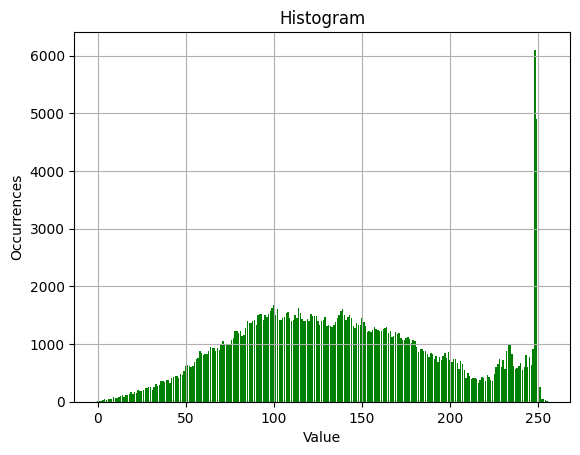

In [65]:
frame = video1[200]
# Create a histogram with custom bins
hist = get_frame_histogram(frame)
plt.bar(bins_values, hist, color='green')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.grid(True)
plt.show()


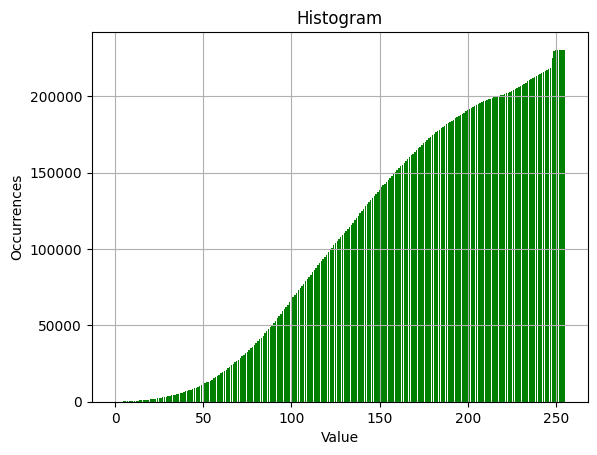

In [66]:
cum_hist = cumsum(hist)
plt.bar(bins_values, cum_hist, color='green')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.grid(True)
plt.show()

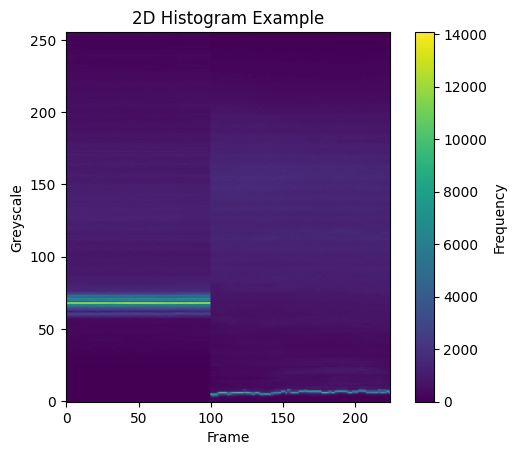

In [67]:
video_histogram = get_video_histogram(video1)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()


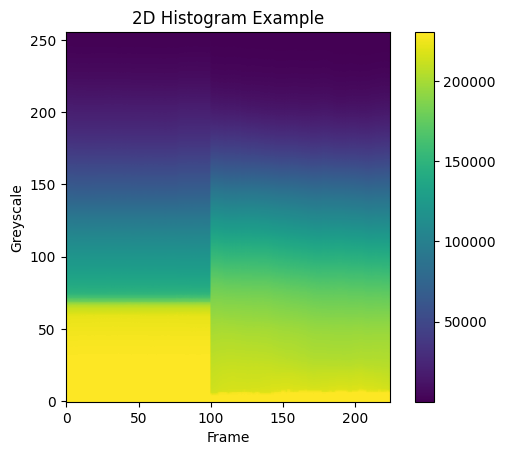

In [68]:
video_cumsum_histogram = cumsum_along_y(video_histogram)
hist_to_show = np.rot90(video_cumsum_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar()
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()
# dist = calculate_distance(video_histogram)
# plt.plot(dist)


99


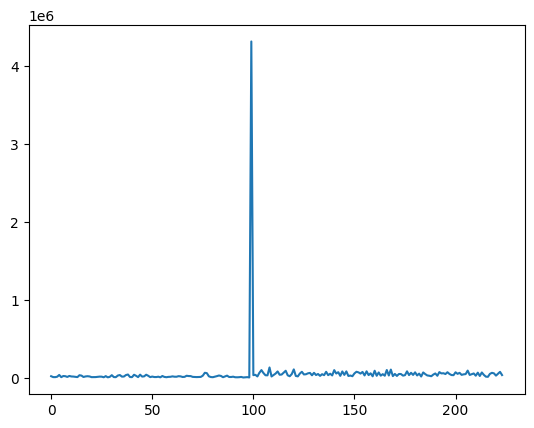

In [69]:
def sum_diff_consecutive_rows(matrix):
    """
    Calculate the sum of differences between consecutive rows in a 2D matrix.

    Parameters:
    - matrix (np.ndarray): Input 2D matrix.

    Returns:
    - sum_diff (np.ndarray): 1D array containing the sum of differences for each column.
    """
    # Calculate differences between consecutive rows
    signed_matrix = matrix.astype(np.int64)
    # Calculate absolute differences between consecutive rows
    abs_diff = np.abs(np.diff(signed_matrix, axis=0))
    # Sum absolute differences along the axis representing rows
    sum_abs_diff = np.sum(abs_diff, axis=1)        
    return sum_abs_diff    



cumsum_histogram_distance = sum_diff_consecutive_rows(video_cumsum_histogram)
plt.plot(cumsum_histogram_distance)
print(np.argmax(cumsum_histogram_distance))

In [70]:
# hist1 = video_cumsum_histogram[0].astype(np.int64)
# hist2 = video_cumsum_histogram[1].astype(np.int64)
# mat = np.stack([hist1, hist2], axis=0)
# mat = video_cumsum_histogram[:3, :10].astype(np.int64)
# print(mat)
# print(mat.shape)
# Calculate absolute differences between consecutive rows
# abs_diff = np.abs(np.diff(mat, axis=0))
# print(abs_diff)
# Sum absolute differences along the axis representing rows
# sum_abs_diff = np.sum(abs_diff, axis=1)
    
# print(sum_abs_diff)

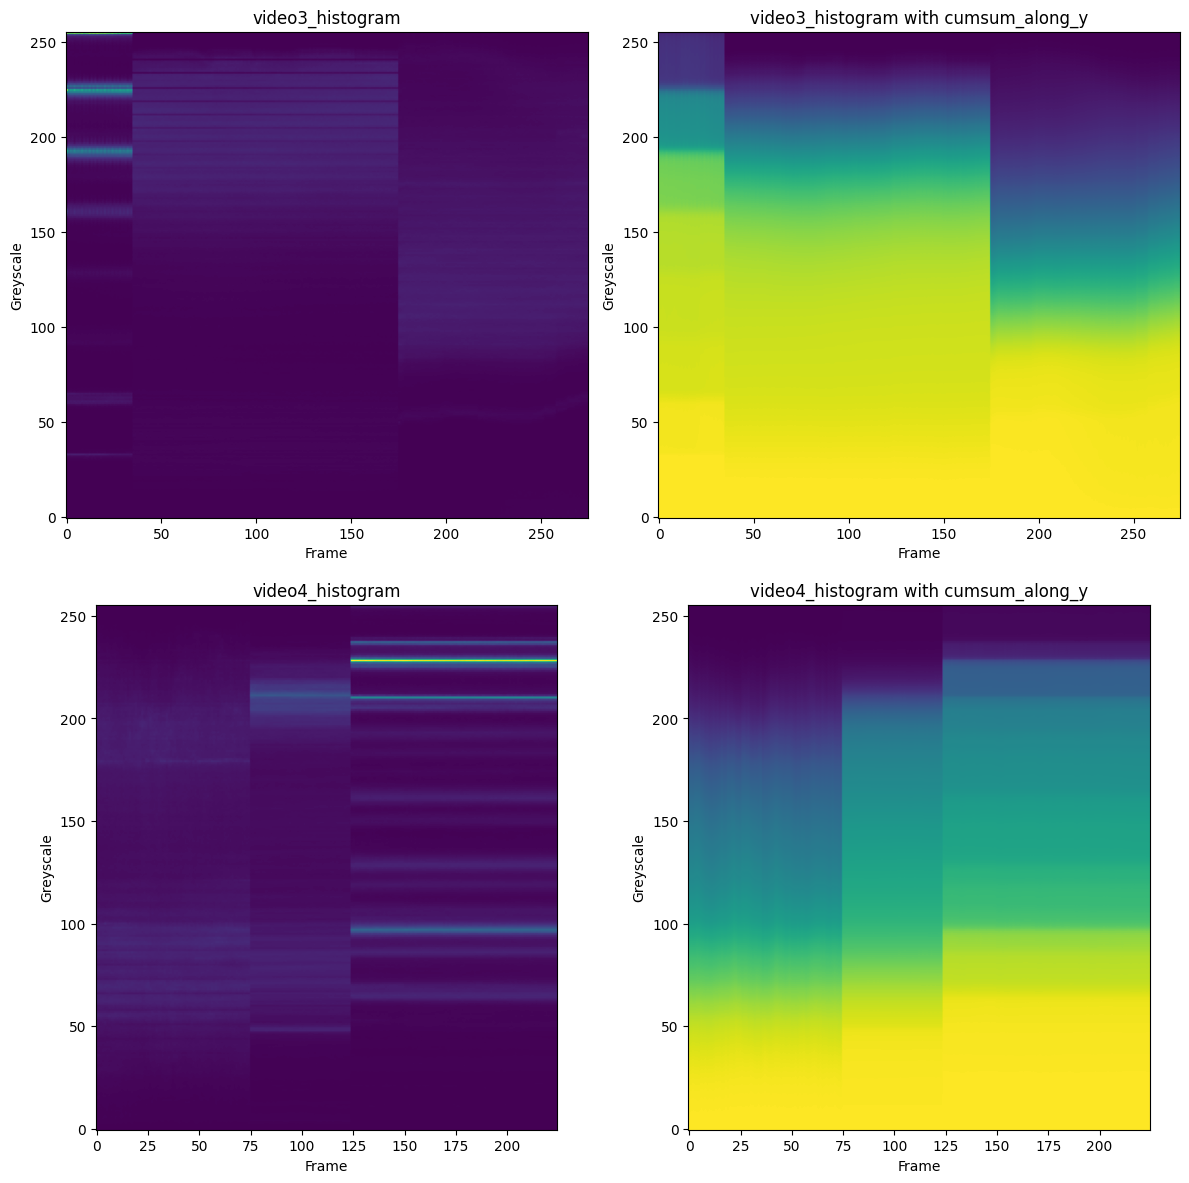

In [101]:
# Assuming you have the necessary functions and modules imported
import matplotlib.pyplot as plt
import numpy as np

# Load video3 and video4
video3 = get_greyscale_video_by_file_path(video3_file_path)
video4 = get_greyscale_video_by_file_path(video4_file_path)

# Calculate histograms for video3 and video4
video3_histogram = get_video_histogram(video3)
video4_histogram = get_video_histogram(video4)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot video3 histogram without cumsum_along_y
axs[0, 0].imshow(np.rot90(video3_histogram), cmap='viridis')
axs[0, 0].set_title('video3_histogram')
axs[0, 0].set_xlabel('Frame')
axs[0, 0].set_ylabel('Greyscale')
axs[0, 0].invert_yaxis()
axs[0, 0].grid(False)

# Plot video3 histogram with cumsum_along_y
axs[0, 1].imshow(np.rot90(cumsum_along_y(video3_histogram)), cmap='viridis')
axs[0, 1].set_title('video3_histogram with cumsum_along_y')
axs[0, 1].set_xlabel('Frame')
axs[0, 1].set_ylabel('Greyscale')
axs[0, 1].invert_yaxis()
axs[0, 1].grid(False)

# Plot video4 histogram without cumsum_along_y
axs[1, 0].imshow(np.rot90(video4_histogram), cmap='viridis')
axs[1, 0].set_title('video4_histogram')
axs[1, 0].set_xlabel('Frame')
axs[1, 0].set_ylabel('Greyscale')
axs[1, 0].invert_yaxis()
axs[1, 0].grid(False)

# Plot video4 histogram with cumsum_along_y
axs[1, 1].imshow(np.rot90(cumsum_along_y(video4_histogram)), cmap='viridis')
axs[1, 1].set_title('video4_histogram with cumsum_along_y')
axs[1, 1].set_xlabel('Frame')
axs[1, 1].set_ylabel('Greyscale')
axs[1, 1].invert_yaxis()
axs[1, 1].grid(False)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()


In [72]:
from scipy.ndimage import gaussian_filter
def blur_image(image, sigma):
    """
    Apply Gaussian blur to an image.

    Parameters:
    - image (np.ndarray): Input image as a 2D NumPy array.
    - sigma (float): Standard deviation of the Gaussian filter. Default is 1.0.

    Returns:
    - blurred_image (np.ndarray): Blurred image.
    """
    # Apply Gaussian blur
    blurred_image = gaussian_filter(image, sigma)

    return blurred_image

def blur_video(video, sigma=1.0):
    blured_video = np.zeros(video.shape)
    with media.VideoWriter('./assets/grey_scale.mp4', (video.shape[1],video.shape[2]), fps=25) as writer:
        for i in range(video.shape[0]):
            image = blur_image(video[i], sigma)
            blured_video[i] = blur_image(image, sigma=sigma)
            writer.add_image(image)    
    
    return blured_video

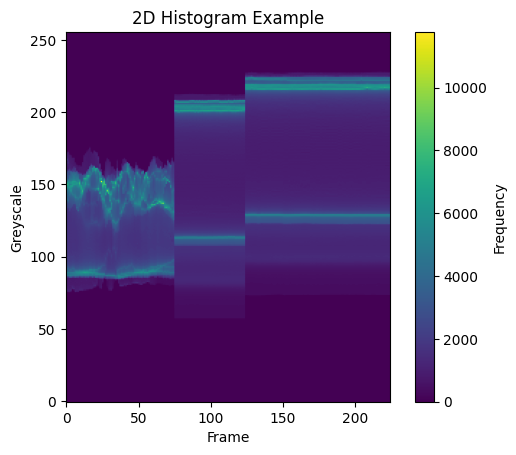

In [73]:
blured_video = blur_video(video3, 40) 
video_histogram = get_video_histogram(blured_video)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()



In [74]:
# def quantize_video(image) -> np.ndarray: 
frame_a = video3[20]
frame_b = video3[50]
hist_a, hist_edges = np.histogram(video3, bins=9, range=(0,255)) 
hist_edges = hist_edges.astype(np.uint8)
hist_edges

array([  0,  28,  56,  85, 113, 141, 170, 198, 226, 255], dtype=uint8)

In [75]:
def map_to_closest_values(matrix, values):
    """
    Map each pixel value in a 2D matrix to the closest value in the given array.

    Parameters:
    - matrix (np.ndarray): Input 2D matrix of integers.
    - values (np.ndarray): Array of integers to map to.

    Returns:
    - mapped_matrix (np.ndarray): Matrix with each pixel value mapped to the closest value in the array.
    """
    # Flatten the matrix and values arrays for easier computation
    flat_matrix = matrix.flatten()
    flat_values = values.flatten()

    # Find the index of the closest value in values for each pixel in the matrix
    closest_indices = np.argmin(np.abs(flat_matrix[:, np.newaxis] - flat_values), axis=1)

    # Map each pixel value to the closest value in values
    mapped_matrix = flat_values[closest_indices].reshape(matrix.shape)

    return mapped_matrix


def quantize_video(video, values_arr):
    quantized_video = np.zeros(video.shape).astype(np.uint8)
    with media.VideoWriter('./assets/grey_scale.mp4', (video.shape[1],video.shape[2]), fps=25) as writer:
        for i in range(video.shape[0]):
            image = map_to_closest_values(video[i], values_arr)
            quantized_video[i] = image
            writer.add_image(image)    
    
    return quantized_video

In [76]:
quantized_video = quantize_video(video3, hist_edges)

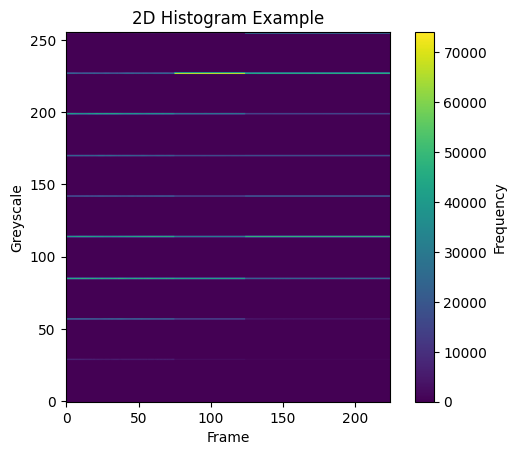

In [77]:
video_histogram = get_video_histogram(quantized_video)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()

74


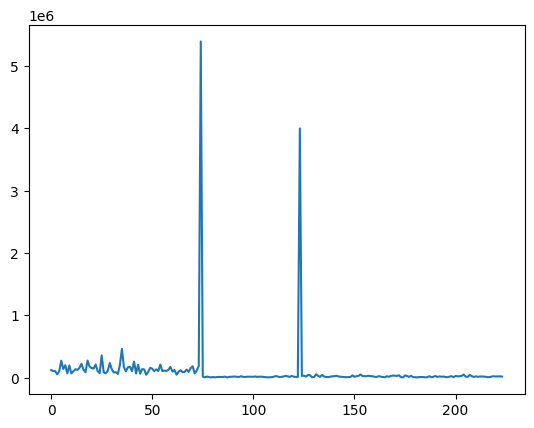

In [78]:
video4_histogram = cumsum_along_y(video_histogram)
cumsum_histogram_distance = sum_diff_consecutive_rows(video4_histogram)
plt.plot(cumsum_histogram_distance)
print(np.argmax(cumsum_histogram_distance))

In [79]:
video_histogram = get_video_histogram(video3)


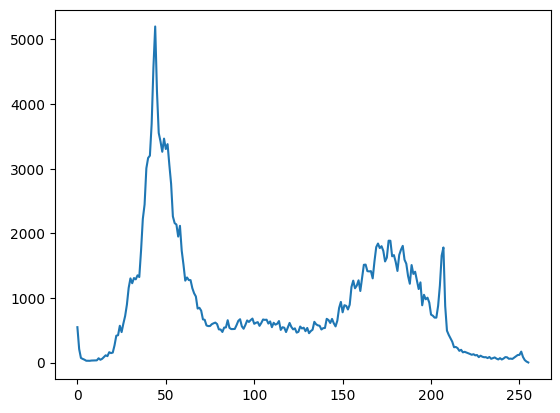

In [80]:
plt.plot(video_histogram[100])


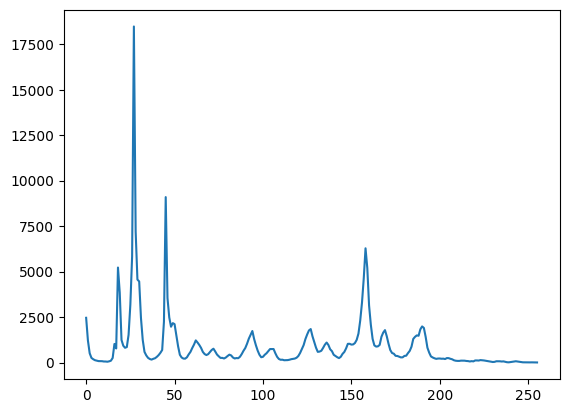

In [81]:
plt.plot(video_histogram[200])


In [82]:
import numpy as np
from sklearn.cluster import KMeans

def optimal_quantization(data, num_bins):
    # Reshape the 3D to a 1D array
    flattened_data = data.reshape(-1)
    matrix_2d = np.column_stack((flattened_data, np.zeros(len(flattened_data))))

    # Fit k-means clustering
    kmeans = KMeans(n_clusters=num_bins, random_state=42)
    kmeans.fit(matrix_2d) # np.zeros(len(flattened_data))

    # Get the cluster centers as the optimal quantization levels
    quantization_levels = kmeans.cluster_centers_

    return quantization_levels

In [83]:
opt = optimal_quantization(video3, 8)

/Users/hadar/Dev/ImageProcessing/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/hadar/Dev/ImageProcessing/.venv/lib/python3.10/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/hadar/Dev/ImageProcessing/.venv/lib/python3.10/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/hadar/Dev/ImageProcessing/.venv/lib/python3.10/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/hadar/Dev/ImageProcessing/.venv/lib/python3.10/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


In [84]:
   opt  

array([[ 24.2432855 ,   0.        ],
       [159.92727051,   0.        ],
       [ 96.94997539,   0.        ],
       [187.32595292,   0.        ],
       [ 68.4342007 ,   0.        ],
       [129.71497406,   0.        ],
       [217.53600123,   0.        ],
       [ 46.78752233,   0.        ]])

In [85]:
video3.reshape(-1).shape

(51840000,)

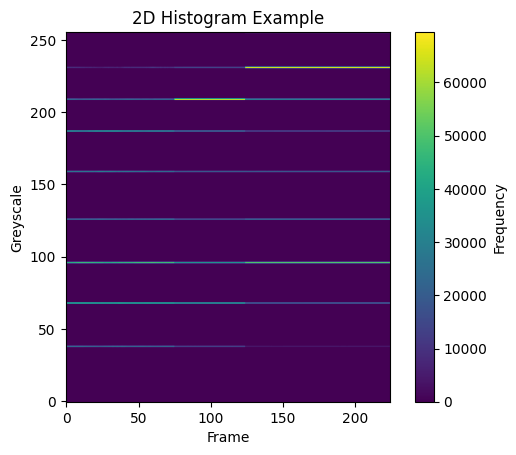

In [86]:
def randomly_choose_percent(video, percent):
    percent = np.max(percent, 0.1)
    num_frames = video.shape[0]
    num_frames_to_choose = int(percent * num_frames)

    # Randomly choose 10% of the frames
    chosen_frames_indices = np.random.choice(num_frames, size=num_frames_to_choose, replace=False)

    # Create a new 3D matrix with only the chosen frames
    chosen_frames_data = video[chosen_frames_indices, :, :]

    return chosen_frames_data


quantized_video = quantize_video(video3, opt)

video_histogram = get_video_histogram(quantized_video)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show, cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()

74


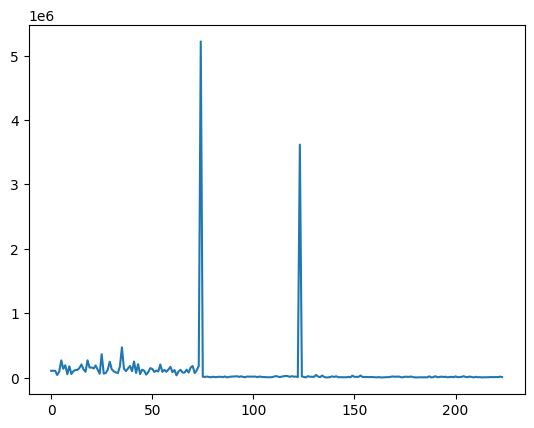

In [87]:
video4_histogram = cumsum_along_y(video_histogram)
cumsum_histogram_distance = sum_diff_consecutive_rows(video4_histogram)
plt.plot(cumsum_histogram_distance)
print(np.argmax(cumsum_histogram_distance))

ValueError: Input could not be cast to an at-least-1D NumPy array

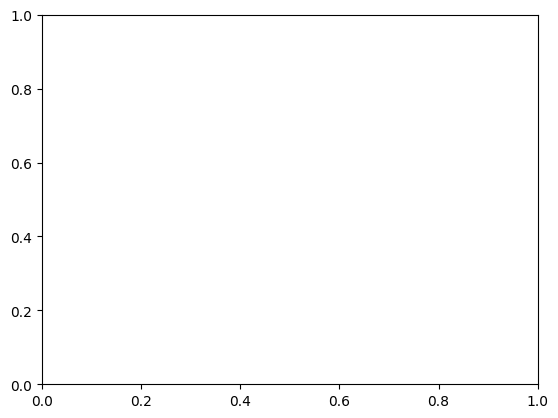

In [93]:
im_a_hist = np.histogram(video3[100])
plt.plot(im_a_hist)
im_b_hist = np.histogram(video3[200])
plt.plot(im_b_hist)


In [94]:
video3 = get_greyscale_video_by_file_path(video3_file_path)
video3_histogram = cumsum_along_y(get_video_histogram(video3))



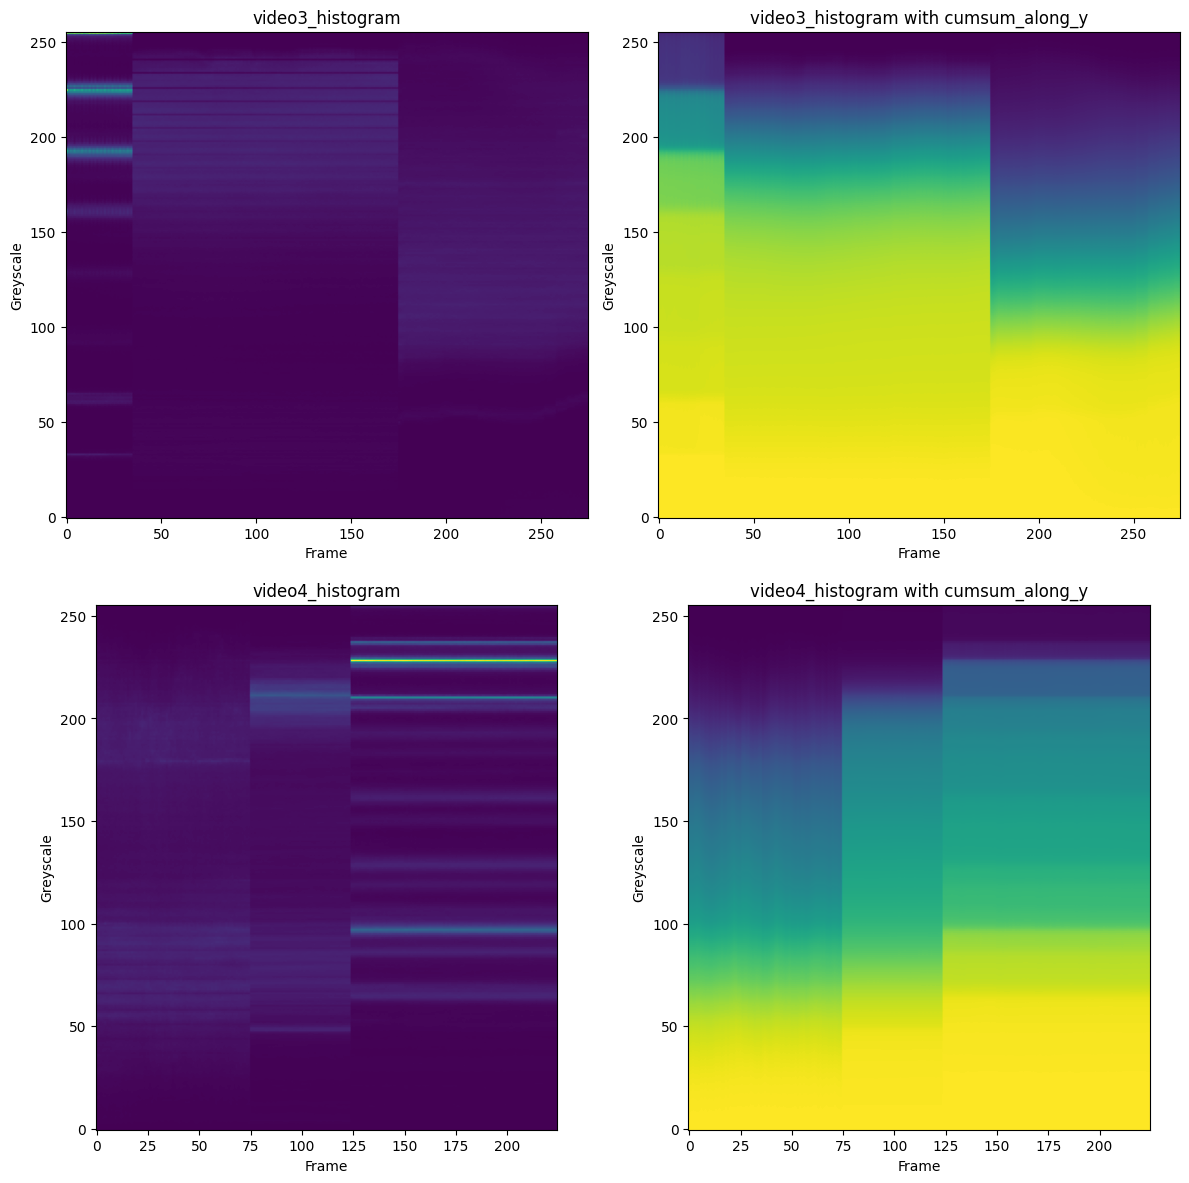

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Load video3 and video4
video3 = get_greyscale_video_by_file_path(video3_file_path)
video4 = get_greyscale_video_by_file_path(video4_file_path)

# Calculate histograms for video3 and video4
video3_histogram = get_video_histogram(video3)
video4_histogram = get_video_histogram(video4)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot video3 histogram without cumsum_along_y
axs[0, 0].imshow(np.rot90(video3_histogram), cmap='viridis')
axs[0, 0].set_title('video3_histogram')
axs[0, 0].set_xlabel('Frame')
axs[0, 0].set_ylabel('Greyscale')
axs[0, 0].invert_yaxis()
axs[0, 0].grid(False)

# Plot video3 histogram with cumsum_along_y
axs[0, 1].imshow(np.rot90(cumsum_along_y(video3_histogram)), cmap='viridis')
axs[0, 1].set_title('video3_histogram with cumsum_along_y')
axs[0, 1].set_xlabel('Frame')
axs[0, 1].set_ylabel('Greyscale')
axs[0, 1].invert_yaxis()
axs[0, 1].grid(False)

# Plot video4 histogram without cumsum_along_y
axs[1, 0].imshow(np.rot90(video4_histogram), cmap='viridis')
axs[1, 0].set_title('video4_histogram')
axs[1, 0].set_xlabel('Frame')
axs[1, 0].set_ylabel('Greyscale')
axs[1, 0].invert_yaxis()
axs[1, 0].grid(False)

# Plot video4 histogram with cumsum_along_y
axs[1, 1].imshow(np.rot90(cumsum_along_y(video4_histogram)), cmap='viridis')
axs[1, 1].set_title('video4_histogram with cumsum_along_y')
axs[1, 1].set_xlabel('Frame')
axs[1, 1].set_ylabel('Greyscale')
axs[1, 1].invert_yaxis()
axs[1, 1].grid(False)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()



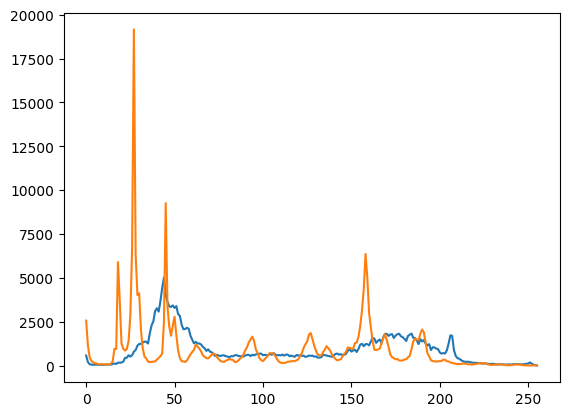

In [108]:
frame_a  = video4[120]
frame_b = video4[130]
plt.plot(get_frame_histogram(frame_a))
plt.plot(get_frame_histogram(frame_b))

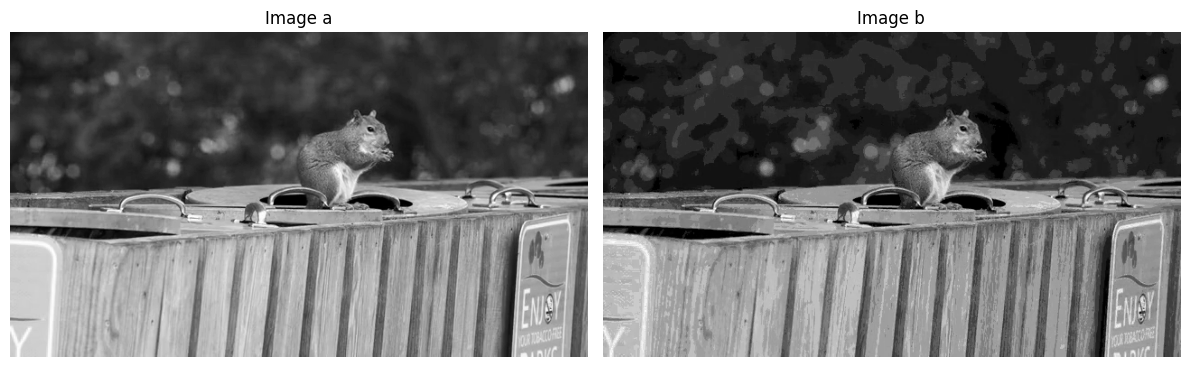

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot the first image
axs[0].imshow(frame_a, cmap='gray')
axs[0].set_title('Image a')
axs[0].axis('off')  # Turn off axis labels and ticks

# Plot the second image
axs[1].imshow(frame_b, cmap='gray')
axs[1].set_title('Image b')
axs[1].axis('off')  # Turn off axis labels and ticks

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [141]:
# Run FFT and sort it
fft_values = np.fft.fft2(frame_b)
abs_fft_values = np.abs(fft_values)
# First change the 2D array of FFT value to a single 1D list, and then sort it
fft_sorted_values = np.sort(abs_fft_values.reshape(-1))

In [126]:
fft_values.shape

(360, 640)

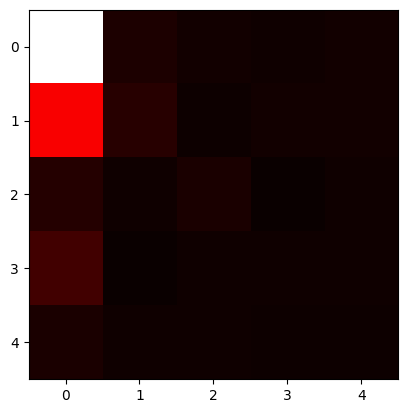

In [142]:
max_abs_value = fft_sorted_values[-1]
normalized_abs_fft_values = abs_fft_values/max_abs_value
plt.imshow(abs_fft_values[:5,:5], cmap='hot', interpolation='nearest')
plt.show()

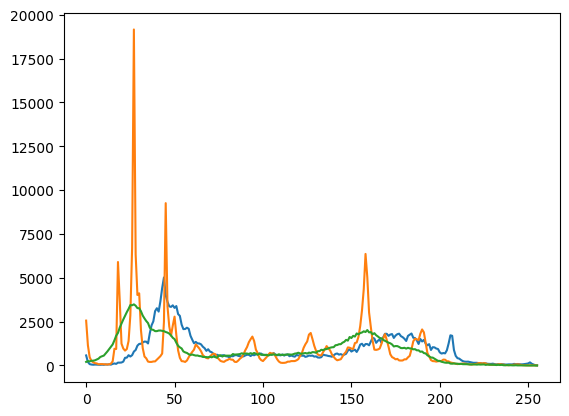

In [140]:
# for index, keep in enumerate([0.02]): #([1, 0.1, 0.01, 0.001, 0.0005, 0.0001]):
keep = 0.02
thresh = fft_sorted_values[int(np.floor((1-keep)*len(fft_sorted_values)))]
ind = np.abs(fft_values)>thresh
high_fft_values = fft_values * ind
compressed_image_a = np.fft.ifft2(high_fft_values).real

plt.plot(get_frame_histogram(frame_a))
plt.plot(get_frame_histogram(frame_b))
plt.plot(get_frame_histogram(compressed_image_a))

  # plt.subplot(2, 3, index+1)
  # plt.imshow(compressed_image, cmap='gray')
  # plt.axis('off')
  # plt.title(f'Keep {keep*100}%')

Text(0.5, 1.0, 'Keep 2.0%')

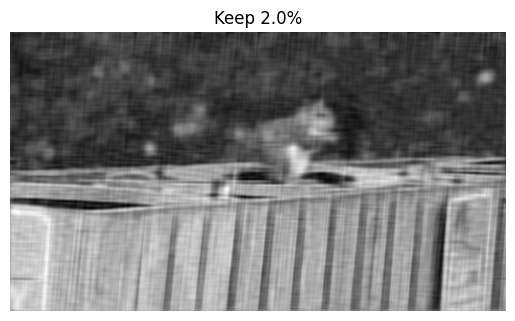

In [143]:
  plt.imshow(compressed_image_a, cmap='gray')
  plt.axis('off')
  plt.title(f'Keep {keep*100}%')

In [144]:
# Run FFT and sort it
fft_values = np.fft.fft2(frame_a)
abs_fft_values = np.abs(fft_values)
# First change the 2D array of FFT value to a single 1D list, and then sort it
fft_sorted_values = np.sort(abs_fft_values.reshape(-1))

max_abs_value = fft_sorted_values[-1]
normalized_abs_fft_values = abs_fft_values/max_abs_value

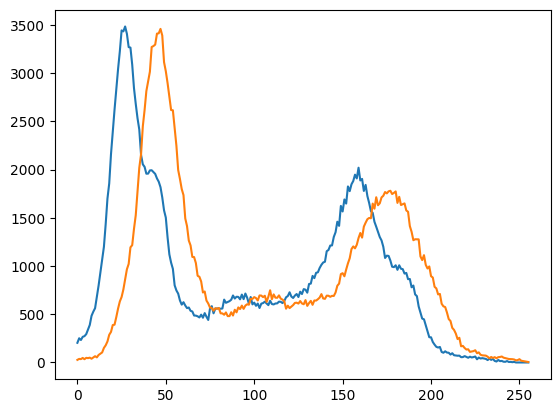

In [147]:
# for index, keep in enumerate([0.02]): #([1, 0.1, 0.01, 0.001, 0.0005, 0.0001]):
thresh = fft_sorted_values[int(np.floor((1-keep)*len(fft_sorted_values)))]
ind = np.abs(fft_values)>thresh
high_fft_values = fft_values * ind
compressed_image_b = np.fft.ifft2(high_fft_values).real

# plt.plot(get_frame_histogram(frame_a))
# plt.plot(get_frame_histogram(frame_b))
plt.plot(get_frame_histogram(compressed_image_a))
plt.plot(get_frame_histogram(compressed_image_b))


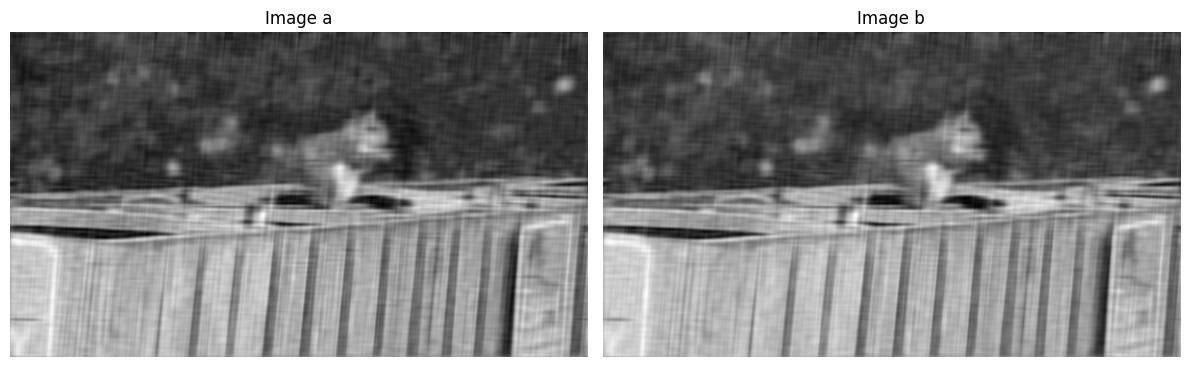

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot the first image
axs[0].imshow(compressed_image_a, cmap='gray')
axs[0].set_title('Image a')
axs[0].axis('off')  # Turn off axis labels and ticks

# Plot the second image
axs[1].imshow(compressed_image_b, cmap='gray')
axs[1].set_title('Image b')
axs[1].axis('off')  # Turn off axis labels and ticks

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [185]:
def compress_image(image, keep) -> np.ndarray:
    # Run FFT and sort it
    fft_values = np.fft.fft2(image)
    abs_fft_values = np.abs(fft_values)
    # First change the 2D array of FFT value to a single 1D list, and then sort it
    fft_sorted_values = np.sort(abs_fft_values.reshape(-1))
    
    max_abs_value = fft_sorted_values[-1]
    normalized_abs_fft_values = abs_fft_values/max_abs_value
    thresh = fft_sorted_values[int(np.floor((1-keep)*len(fft_sorted_values)))]
    ind = np.abs(fft_values)>thresh
    high_fft_values = fft_values * ind
    return np.fft.ifft2(high_fft_values).real

def compress_video(video, keep) -> np.ndarray:
    compressed_video = np.zeros(video.shape).astype(np.uint8)
    for i in range(video.shape[0]):
        image = compress_image(video[i], keep)
        compressed_video[i] = image
    return compressed_video

In [174]:
frame_c = video4[120] 
frame_c_compressed = compress_image(frame_c, keep)

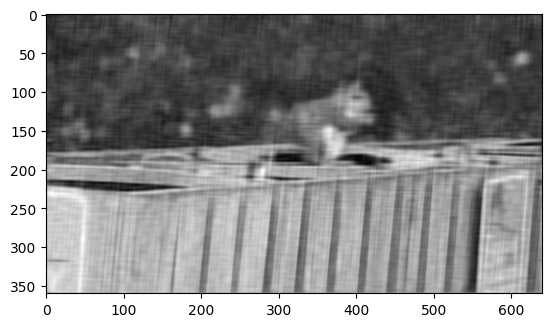

In [175]:
plt.imshow(frame_c_compressed, cmap='gray')

In [ ]:

import os
import sys
import mediapy as media
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans


NUM_OF_GRAY_LEVELS = 256
ALL_GREYSCALE_HISTOGRAM_BINS = np.arange(NUM_OF_GRAY_LEVELS + 1)
GREYSCALE_HISTOGRAM_BINS_VALUES = np.arange(NUM_OF_GRAY_LEVELS)


# Skeleton function - DO NOT CHANGE SIGNATURE!!!
def main(video_path, video_type):
    """
    Main entry point for ex1
    :param video_path: path to video file
    :param video_type: category of the video (either 1 or 2)
    :return: a tuple of integers representing the frame number for which the scene cut was detected (i.e. the last frame index of the first scene and the first frame index of the second scene)
    """
    if video_type == 1:
        return process_video_type_1(video_path)
    elif video_type == 2:
        return process_video_type_2(video_path)
    else:
        raise ValueError("Invalid video type")


def internal_main():
    """
    Internal main entry point for the program.
    """
    try:
        # Check if arguments are provided from the terminal
        if len(sys.argv) != 3:
            print("Usage: python ex1.py <video_path> <video_type>")
            sys.exit(1)

        video_path = sys.argv[1]
        video_type = int(sys.argv[2])

        result = main(video_path, video_type)
        print(f"Scene cut detected between frames: {result}")
    except Exception as e:
        print(f"An error occurred: {e}")
        sys.exit(1)


def process_video_type_1(video_path):
    video = get_greyscale_video_by_file_path(video_path)
    video_histogram = get_video_histogram(video)
    video_cumsum_histogram = cumsum_along_y(video_histogram)
    cumsum_histogram_distance = sum_diff_consecutive_rows(video_cumsum_histogram)
    frame_with_max_distance = np.argmax(cumsum_histogram_distance)
    return frame_with_max_distance, (frame_with_max_distance + 1)


def process_video_type_2(video_path):
    video = get_greyscale_video_by_file_path(video_path)
    values_arr = get_video_histogram_edges(video)
    quantized_video = quantize_video(video, values_arr)
    video_histogram = get_video_histogram(quantized_video)
    video_cumsum_histogram = cumsum_along_y(video_histogram)
    cumsum_histogram_distance = sum_diff_consecutive_rows(video_cumsum_histogram)
    frame_with_max_distance = np.argmax(cumsum_histogram_distance)
    return frame_with_max_distance, (frame_with_max_distance + 1)


def get_video_by_file_path(path: str):
    """

    :rtype: mediapy_video
    """
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    return media.read_video(path)


def get_grayscale_video(mediapy_video) -> np.ndarray:
    num_frames, height, width, channels = mediapy_video.shape
    greyscale_video = np.empty((num_frames, height, width), dtype=np.uint8)

    for i in range(num_frames):
        greyscale_video[i] = get_greyscale_array_from_frame(mediapy_video[i])

    return greyscale_video


def get_greyscale_array_from_frame(mediapy_frame) -> np.ndarray:
    return np.array(Image.fromarray(np.array(mediapy_frame)).convert('L'))


def get_greyscale_video_by_file_path(path):
    return get_grayscale_video(get_video_by_file_path(path))


def get_frame_histogram_with_defined_bins(frame: np.ndarray, bins: np.ndarray = ALL_GREYSCALE_HISTOGRAM_BINS) -> np.ndarray:
    hist, _ = np.histogram(frame, bins=bins)
    return hist


def get_video_histogram(video) -> np.ndarray:
    num_frames, _, _ = video.shape
    video_hist = np.zeros((num_frames, NUM_OF_GRAY_LEVELS))
    for i in range(num_frames):
        video_hist[i] = get_frame_histogram_with_defined_bins(video[i])
    return video_hist


def cumsum(histogram):
    return np.cumsum(histogram)


def cumsum_along_y(matrix):
    """
    Calculate the cumulative sum along the y-axis for each x in a 2D array.

    Parameters:
    - matrix (np.ndarray): Input 2D array.

    Returns:
    - cumsum_result (np.ndarray): 2D array containing cumulative sum for each x along the y-axis.
    """
    # Calculate cumulative sum along the y-axis
    cumsum_result = np.cumsum(matrix, axis=1)

    return cumsum_result


def sum_diff_consecutive_rows(matrix):
    """
    Calculate the sum of differences between consecutive rows in a 2D matrix.

    Parameters:
    - matrix (np.ndarray): Input 2D matrix.

    Returns:
    - sum_diff (np.ndarray): 1D array containing the sum of differences for each column.
    """
    # Calculate differences between consecutive rows
    signed_matrix = matrix.astype(np.int64)
    # Calculate absolute differences between consecutive rows
    abs_diff = np.abs(np.diff(signed_matrix, axis=0))
    # Sum absolute differences along the axis representing rows
    sum_abs_diff = np.sum(abs_diff, axis=1)
    return sum_abs_diff


def randomly_choose_percent(video, percent=0.05):
    percent = np.max([percent, 0.05])
    num_frames = video.shape[0]
    num_frames_to_choose = int(percent * num_frames)

    # Randomly choose 10% of the frames
    chosen_frames_indices = np.random.choice(num_frames, size=num_frames_to_choose, replace=False)

    # Create a new 3D matrix with only the chosen frames
    chosen_frames_data = video[chosen_frames_indices, :, :]

    return chosen_frames_data


def optimal_quantization(data, num_bins):
    # Reshape the 3D to a 1D array
    flattened_data = data.reshape(-1)
    matrix_2d = np.column_stack((flattened_data, np.zeros(len(flattened_data))))

    # Fit k-means clustering
    kmeans = KMeans(n_clusters=num_bins, random_state=42, n_init=10)
    kmeans.fit(matrix_2d) # np.zeros(len(flattened_data))

    # Get the cluster centers as the optimal quantization levels
    quantization_levels = kmeans.cluster_centers_

    return quantization_levels


def get_video_histogram_edges(video, num_of_bins=9) -> np.ndarray:
    video_sample = randomly_choose_percent(video)
    return optimal_quantization(video_sample, num_of_bins)


def map_to_closest_values(matrix, values):
    """
    Map each pixel value in a 2D matrix to the closest value in the given array.

    Parameters:
    - matrix (np.ndarray): Input 2D matrix of integers.
    - values (np.ndarray): Array of integers to map to.

    Returns:
    - mapped_matrix (np.ndarray): Matrix with each pixel value mapped to the closest value in the array.
    """
    # Flatten the matrix and values arrays for easier computation
    flat_matrix = matrix.flatten()
    flat_values = values.flatten()

    # Find the index of the closest value in values for each pixel in the matrix
    closest_indices = np.argmin(np.abs(flat_matrix[:, np.newaxis] - flat_values), axis=1)

    # Map each pixel value to the closest value in values
    mapped_matrix = flat_values[closest_indices].reshape(matrix.shape)

    return mapped_matrix


def quantize_video(video, values_arr):
    quantized_video = np.zeros(video.shape).astype(np.uint8)
    for i in range(video.shape[0]):
        image = map_to_closest_values(video[i], values_arr)
        quantized_video[i] = image
    return quantized_video

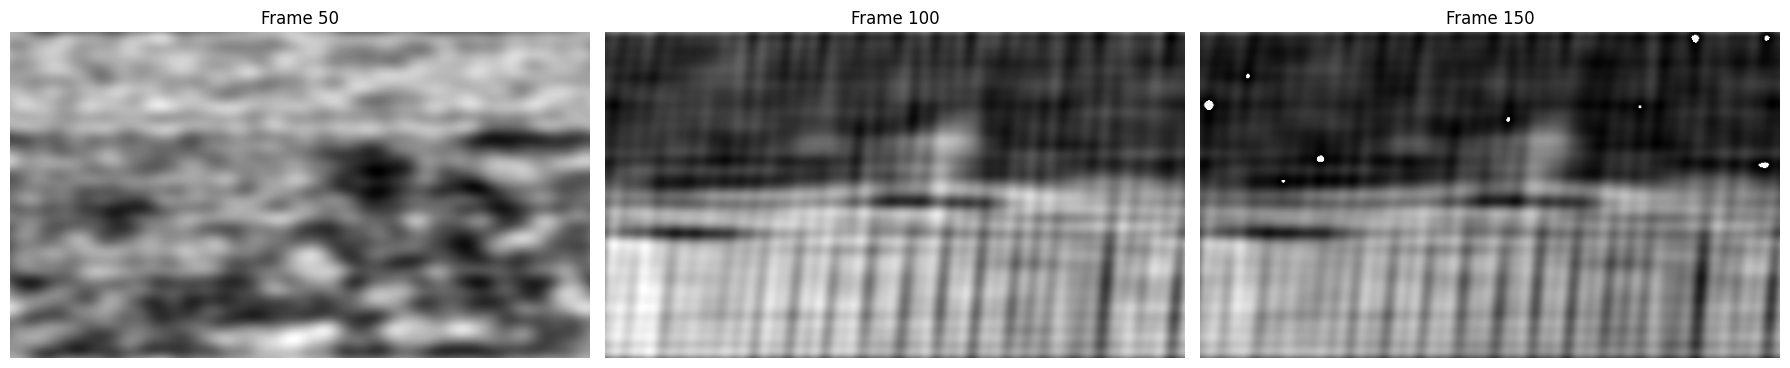

In [210]:
video_4_compressed = compress_video(video4, 0.001)

# Assuming you have a list of images: video_4_compressed

# Create a figure with one row and three columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first image
axs[0].imshow(video_4_compressed[50], cmap='gray')
axs[0].set_title('Frame 50')
axs[0].axis('off')  # Turn off axis labels and ticks

# Plot the second image
axs[1].imshow(video_4_compressed[100], cmap='gray')
axs[1].set_title('Frame 100')
axs[1].axis('off')  # Turn off axis labels and ticks

# Plot the third image
axs[2].imshow(video_4_compressed[150], cmap='gray')
axs[2].set_title('Frame 150')
axs[2].axis('off')  # Turn off axis labels and ticks

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()



In [221]:

compressed_video_histogram = get_video_histogram(video_4_compressed)
compressed_video_cumsum_histogram = cumsum_along_y(compressed_video_histogram)
cumsum_histogram_distance = sum_diff_consecutive_rows(compressed_video_cumsum_histogram)


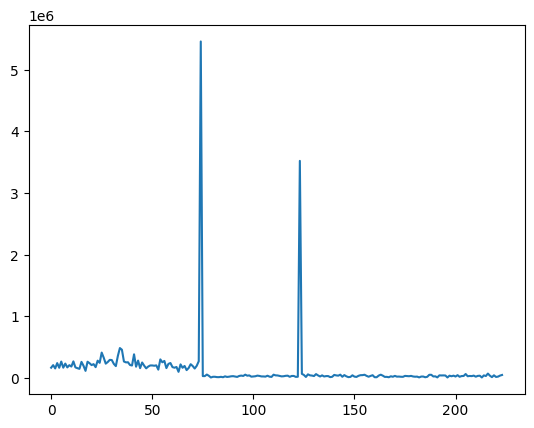

In [222]:
plt.plot(cumsum_histogram_distance)

In [223]:
second_max(cumsum_histogram_distance)

3521751

In [213]:
values_arr = get_video_histogram_edges(video4)
quantized_video = quantize_video(video4, values_arr)
video_histogram = get_video_histogram(quantized_video)
video_cumsum_histogram = cumsum_along_y(video_histogram)
cumsum_histogram_distance = sum_diff_consecutive_rows(video_cumsum_histogram)

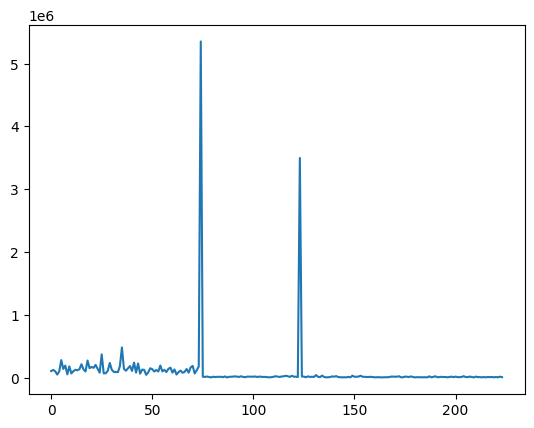

In [214]:
plt.plot(cumsum_histogram_distance)

In [219]:
def second_max(arr):
    return np.sort(arr)[-2]

In [220]:
second_max(cumsum_histogram_distance)

3498608